In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, StandardScaler

# Create synthetic data
np.random.seed(42)
Feature1 = np.random.normal(0, 10, 100)  # High variance feature
Feature2 = np.random.normal(0, 1, 100)   # Low variance feature
Target = np.random.normal(0, 5, 100)

data = pd.DataFrame({'Feature1': Feature1, 'Feature2': Feature2, 'Target': Target})
print("Original Data:\n", data.describe())


Original Data:
          Feature1    Feature2      Target
count  100.000000  100.000000  100.000000
mean    -1.038465    0.022305    0.324481
std      9.081684    0.953669    5.421414
min    -26.197451   -1.918771  -16.206337
25%     -6.009057   -0.805661   -3.277218
50%     -1.269563    0.084107    0.488479
75%      4.059521    0.538170    3.522187
max     18.522782    2.720169   19.263657


In [2]:
def to_percentage(series):
    return (series - series.min()) / (series.max() - series.min()) * 100

data_percentage = data[['Feature1', 'Feature2']].apply(to_percentage)
data_percentage['Target'] = data['Target']  # Keep the target variable as is
print("\nPercentage Transformed Data:\n", data_percentage.describe())



Percentage Transformed Data:
          Feature1    Feature2      Target
count  100.000000  100.000000  100.000000
mean    56.258620   41.843086    0.324481
std     20.307775   20.557905    5.421414
min      0.000000    0.000000  -16.206337
25%     45.143759   23.994934   -3.277218
50%     55.741857   43.175342    0.488479
75%     67.658350   52.963424    3.522187
max    100.000000  100.000000   19.263657


In [3]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
data_quantile_normalized = quantile_transformer.fit_transform(data_percentage[['Feature1', 'Feature2']])
data_quantile_normalized = pd.DataFrame(data_quantile_normalized, columns=['Feature1', 'Feature2'])
data_quantile_normalized['Target'] = data['Target']
print("\nQuantile Normalized Data:\n", data_quantile_normalized.describe())



Quantile Normalized Data:
            Feature1      Feature2      Target
count  1.000000e+02  1.000000e+02  100.000000
mean   9.784107e-13  9.782486e-13    0.324481
std    1.207630e+00  1.207630e+00    5.421414
min   -5.199338e+00 -5.199338e+00  -16.206337
25%   -6.745546e-01 -6.745546e-01   -3.277218
50%    6.938894e-17  6.938894e-17    0.488479
75%    6.745546e-01  6.745546e-01    3.522187
max    5.199338e+00  5.199338e+00   19.263657


/Users/lidiayung/miniforge3/envs/cstar/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


In [4]:
scaler = StandardScaler()
data_z_score = scaler.fit_transform(data_quantile_normalized[['Feature1', 'Feature2']])
data_z_score = pd.DataFrame(data_z_score, columns=['Feature1', 'Feature2'])
data_z_score['Target'] = data['Target']
print("\nZ-Score Standardized Data:\n", data_z_score.describe())



Z-Score Standardized Data:
            Feature1      Feature2      Target
count  1.000000e+02  1.000000e+02  100.000000
mean   1.415534e-17 -7.771561e-18    0.324481
std    1.005038e+00  1.005038e+00    5.421414
min   -4.327096e+00 -4.327096e+00  -16.206337
25%   -5.613912e-01 -5.613912e-01   -3.277218
50%   -8.142133e-13 -8.140797e-13    0.488479
75%    5.613912e-01  5.613912e-01    3.522187
max    4.327096e+00  4.327096e+00   19.263657


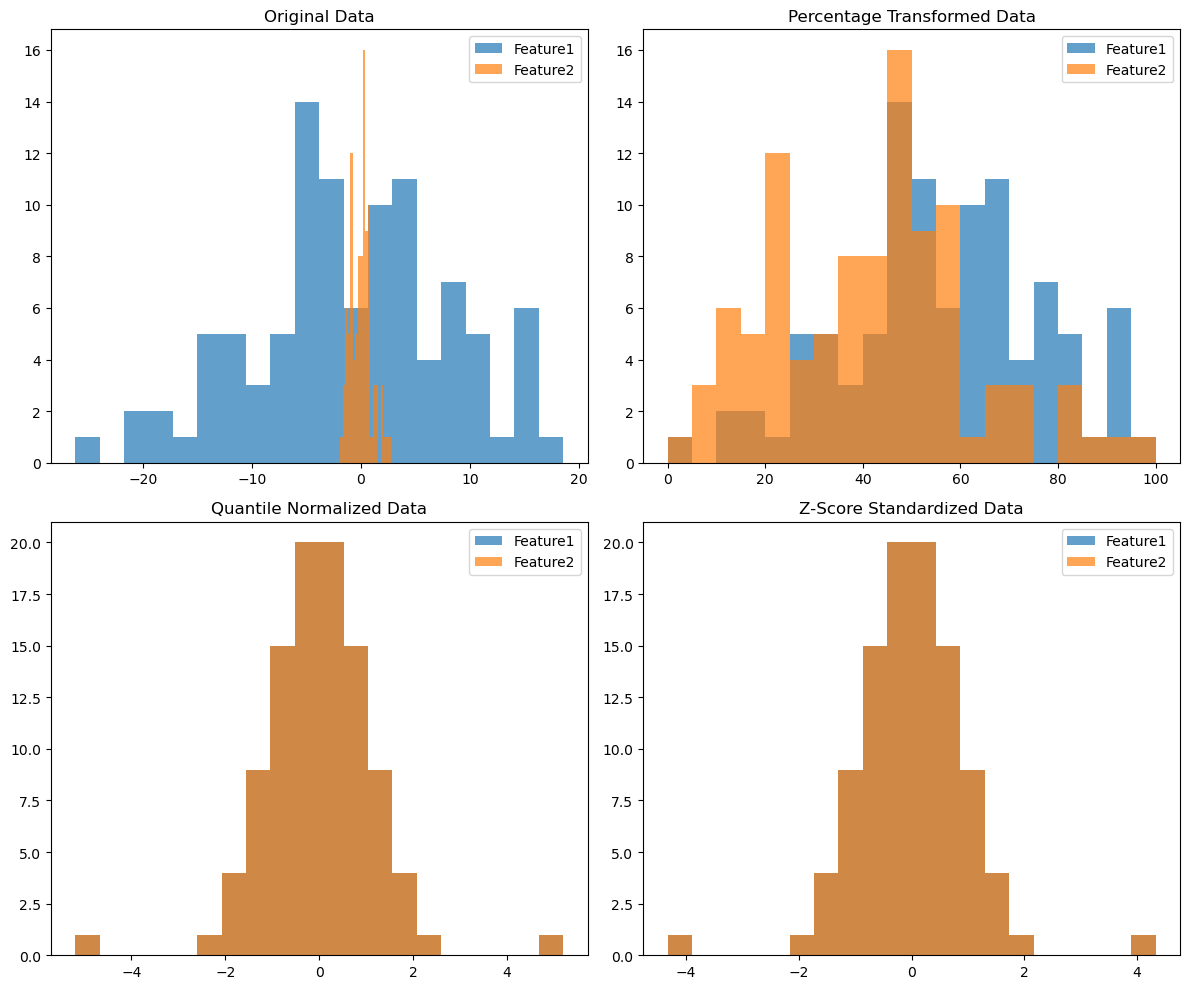

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original Data
axes[0, 0].hist(data['Feature1'], bins=20, alpha=0.7, label='Feature1')
axes[0, 0].hist(data['Feature2'], bins=20, alpha=0.7, label='Feature2')
axes[0, 0].set_title('Original Data')
axes[0, 0].legend()

# Percentage Transformed Data
axes[0, 1].hist(data_percentage['Feature1'], bins=20, alpha=0.7, label='Feature1')
axes[0, 1].hist(data_percentage['Feature2'], bins=20, alpha=0.7, label='Feature2')
axes[0, 1].set_title('Percentage Transformed Data')
axes[0, 1].legend()

# Quantile Normalized Data
axes[1, 0].hist(data_quantile_normalized['Feature1'], bins=20, alpha=0.7, label='Feature1')
axes[1, 0].hist(data_quantile_normalized['Feature2'], bins=20, alpha=0.7, label='Feature2')
axes[1, 0].set_title('Quantile Normalized Data')
axes[1, 0].legend()

# Z-Score Standardized Data
axes[1, 1].hist(data_z_score['Feature1'], bins=20, alpha=0.7, label='Feature1')
axes[1, 1].hist(data_z_score['Feature2'], bins=20, alpha=0.7, label='Feature2')
axes[1, 1].set_title('Z-Score Standardized Data')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Original Data Model
X_train, X_test, y_train, y_test = train_test_split(data[['Feature1', 'Feature2']], data['Target'], test_size=0.2, random_state=42)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
mse_original = mean_squared_error(y_test, predictions)
r2_original = r2_score(y_test, predictions)

# Z-Score Standardized Data Model
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(data_z_score[['Feature1', 'Feature2']], data_z_score['Target'], test_size=0.2, random_state=42)
regressor.fit(X_train_z, y_train_z)
predictions_z = regressor.predict(X_test_z)
mse_z = mean_squared_error(y_test_z, predictions_z)
r2_z = r2_score(y_test_z, predictions_z)

print(f"Original Data MSE: {mse_original}, R2: {r2_original}")
print(f"Z-Score Standardized Data MSE: {mse_z}, R2: {r2_z}")


Original Data MSE: 16.354607253127433, R2: -0.05712799367866239
Z-Score Standardized Data MSE: 15.581099466360703, R2: -0.007130049853800946
